In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
x_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
x_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

# Image exploration

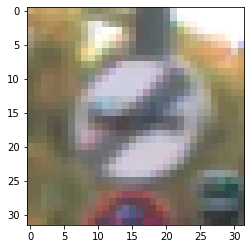

In [11]:
i = 100
plt.imshow(x_train[i])

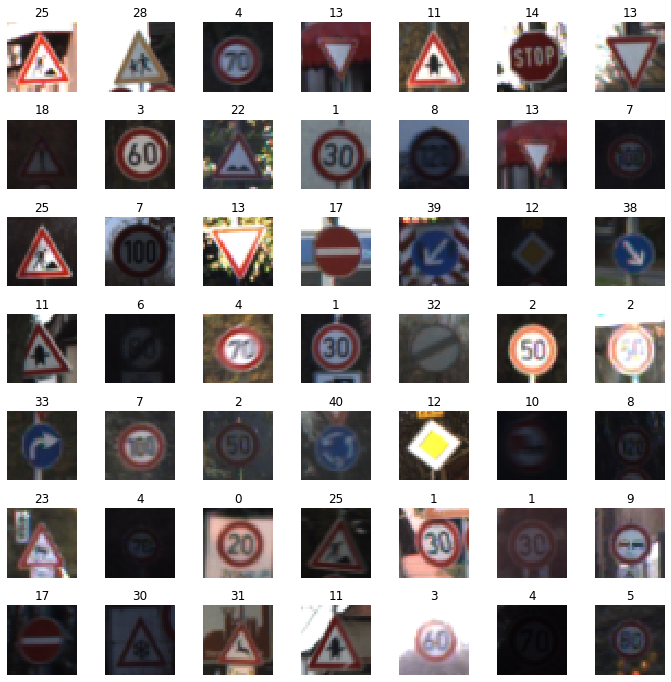

In [12]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
n = len(x_train)
for i in range(L*W):
    index = np.random.randint(0,n)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

# Data preparation

In [13]:
## suffling the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [14]:
# converting coloured image to grey image
x_train_grey = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_grey = np.sum(x_test/3, axis = 3, keepdims = True)
x_validation_grey = np.sum(x_validation/3, axis = 3, keepdims = True)


In [15]:
# normalizing the data
x_train_norm = (x_train_grey - 128)/128
x_test_norm = (x_test_grey - 128)/128
x_validation_norm = (x_validation_grey - 128)/128

In [16]:
x_train_norm.shape

(34799, 32, 32, 1)

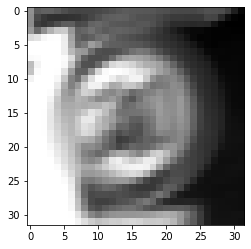

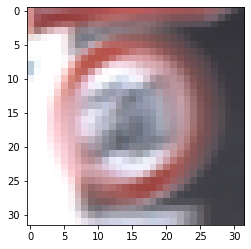

In [17]:
i = 610
plt.imshow(x_train_grey[i].squeeze(),cmap = "gray")
plt.figure()
plt.imshow(x_train[i])

# Model training

In [18]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [19]:
input_shape = x_train_norm[i].shape
input_shape

(32, 32, 1)

In [20]:

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = "relu", input_shape = input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = "relu"))
cnn_model.add(Dense(units = 84, activation = "relu"))
cnn_model.add(Dense(units = 43, activation = "softmax"))

cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(lr = 0.001), metrics = ["accuracy"])

In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [24]:
history = cnn_model.fit(x_train_norm,y_train,epochs = 50, batch_size = 500, verbose = 1, validation_data = (x_validation_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 13s 378us/step - loss: 1.7184 - accuracy: 0.5277 - val_loss: 1.4343 - val_accuracy: 0.5841
Epoch 2/50
34799/34799 [==============================] - 13s 379us/step - loss: 0.9322 - accuracy: 0.7330 - val_loss: 1.0236 - val_accuracy: 0.7032
Epoch 3/50
34799/34799 [==============================] - 16s 452us/step - loss: 0.6707 - accuracy: 0.8098 - val_loss: 0.8451 - val_accuracy: 0.7447
Epoch 4/50
34799/34799 [==============================] - 14s 394us/step - loss: 0.5205 - accuracy: 0.8593 - val_loss: 0.7402 - val_accuracy: 0.7789
Epoch 5/50
34799/34799 [==============================] - 14s 391us/step - loss: 0.4240 - accuracy: 0.8878 - val_loss: 0.6800 - val_accuracy: 0.8007
Epoch 6/50
34799/34799 [==============================] - 13s 380us/step - loss: 0.3653 - accuracy: 0.9028 - val_loss: 0.6331 - val_accuracy: 0.8179
Epoch 7/50
34799/34799 [==============================] -

# Model evaluation

In [26]:
evaluation = cnn_model.evaluate(x_test_norm,y_test)

12630/12630 [==============================] - 2s 183us/step


In [27]:
print("test accuracy: {}".format(evaluation[1]))

test accuracy: 0.8542359471321106


In [28]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

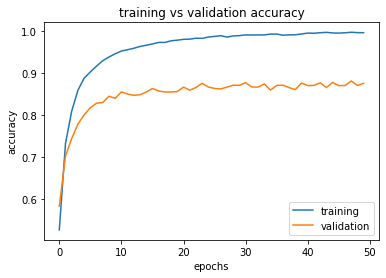

In [30]:
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy)
plt.plot(epochs,validation_accuracy)
plt.title("training vs validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["training","validation"])


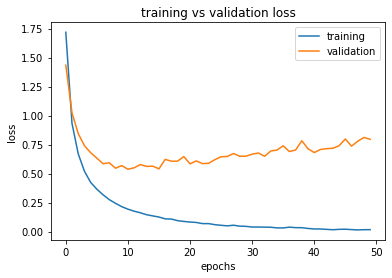

In [31]:
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epochs,training_loss)
plt.plot(epochs,validation_loss)
plt.title("training vs validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["training","validation"])

# Predictions

In [32]:
y_predict = cnn_model.predict_classes(x_test_norm)

In [33]:
y_predict

array([16,  1, 38, ...,  3,  7,  4], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 30,  27,   0, ...,   0,   0,   0],
       [  3, 665,  16, ...,   0,   0,   0],
       [  0,  37, 629, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  35,   0,   0],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   0,  18,  58]], dtype=int64)

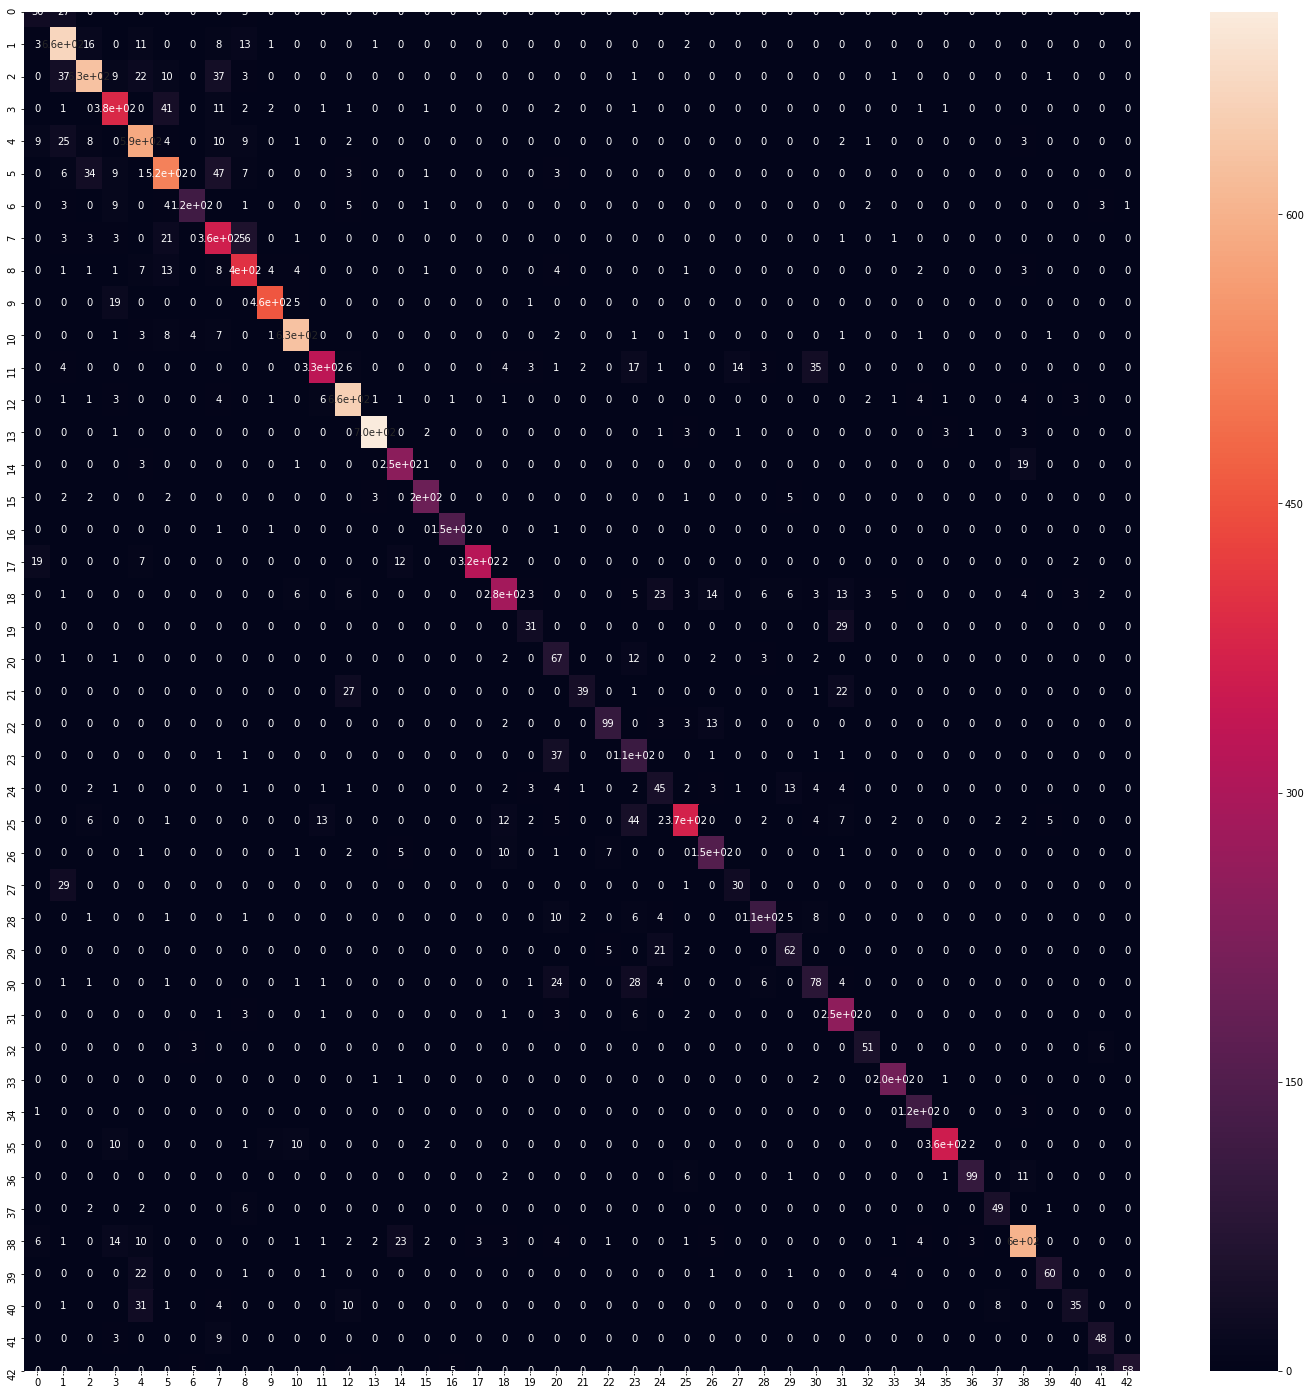

In [37]:
fig = plt.figure(figsize = (25,25))
sns.heatmap(cm,annot = True)

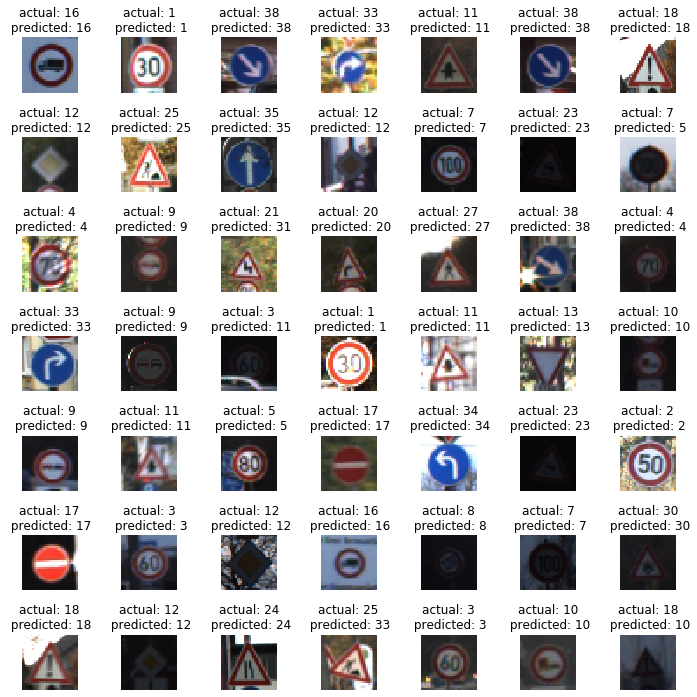

In [46]:
l = 7
w = 7
fig,axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()
for i in range(l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title("actual: {}\n predicted: {}".format(y_test[i],y_predict[i]))
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.8,wspace = 0.4)